empty 377 377
oil 400 400
vinegar 260 260
water 400 400


GaussianNB()

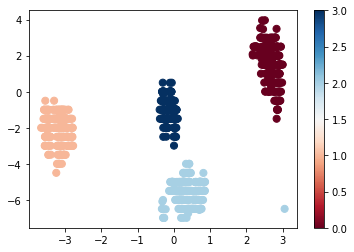

In [6]:
import glob, os
## 导入数据
matls = ['empty', 'oil', 'vinegar', 'water']
dfs = []
for matl in matls:
    df_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl)
    df_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)
    dfs.append({'front': df_f, 'tail': df_t})
    print(matl, len(df_f), len(df_t))
y = []
d_p = []
d_r = []
for i in range(0, 4):
    diff_phase = dfs[i]['front']['PHASE'].values - dfs[i]['tail']['PHASE'].values
    diff_rssi = dfs[i]['front']['RSSI'].values - dfs[i]['tail']['RSSI'].values
    d_p.extend(diff_phase)
    d_r.extend(diff_rssi)
    y.extend(np.repeat([i], len(diff_phase)))
X = np.column_stack((d_p, d_r))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.colorbar()
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50


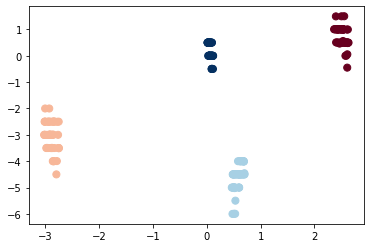

In [9]:
# import sys
# sys.path.extend(['d:\\atom\\python'])
# import clean_data as cleaner

## 室外测试
matls = ['empty', 'oil', 'vinegar', 'water']
d_r = []
d_p = []
y = []
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_front_kde_outdoor.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_tail_kde_outdoor.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    y.extend(model.predict(np.column_stack((diff_p, diff_r))))

    d_r.extend(diff_r.values)
    d_p.extend(diff_p)
    
plt.scatter(d_p, d_r, c=y, s=50, cmap='RdBu')

----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


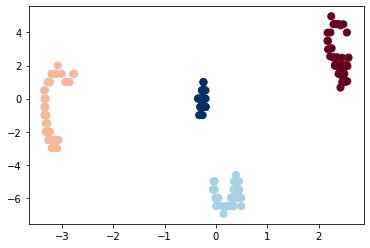

In [11]:
## 室内测试
matls = ['empty', 'oil', 'vinegar', 'water']
d_r = []
d_p = []
y = []
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_front_noback.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_tail_noback.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    y.extend(model.predict(np.column_stack((diff_p, diff_r))))

    d_r.extend(diff_r.values)
    d_p.extend(diff_p)
    
plt.scatter(d_p, d_r, c=y, s=50, cmap='RdBu')
print(y)

In [3]:
## 测试导出
matls = ['empty', 'oil', 'vinegar', 'water']
data = {}

for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_front_kde_outdoor.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_%s_tail_kde_outdoor.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    
    data['outdoor_%s_r' % matl] = diff_r.values
    data['outdoor_%s_p' % matl] = diff_p
    
for matl in matls:
    print('----------%s------------' % matl)
    df_test_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_front_noback.csv' % matl)
    df_test_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\noback\\d1_%s_tail_noback.csv' % matl)

    print(len(df_test_f), len(df_test_t))
    diff_r = df_test_f['RSSI'] - df_test_t['RSSI']
    diff_p = np.unwrap(df_test_f['PHASE']) - np.unwrap(df_test_t['PHASE'])
    
    data['open_%s_r' % matl] = diff_r.values
    data['open_%s_p' % matl] = diff_p

import scipy.io
scipy.io.savemat('diff_test.mat', data)

----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50
----------empty------------
50 50
----------oil------------
50 50
----------vinegar------------
50 50
----------water------------
50 50
